In [5]:
import numpy as np
import pandas as pd

# Replace with your raw GitHub link to train.csv
training_data = 'https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/train-3.csv'
train = pd.read_csv(training_data)
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
# Replace with your raw GitHub link to test.csv
test_data = 'https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/test-3.csv'
test = pd.read_csv(test_data)
test.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [46]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=test)

https://docs.google.com/spreadsheets/d/1uBlTbl_JaeHsesEELyZpJZ0-YVdU_l8ahWvJPiYEMUk/edit#gid=0


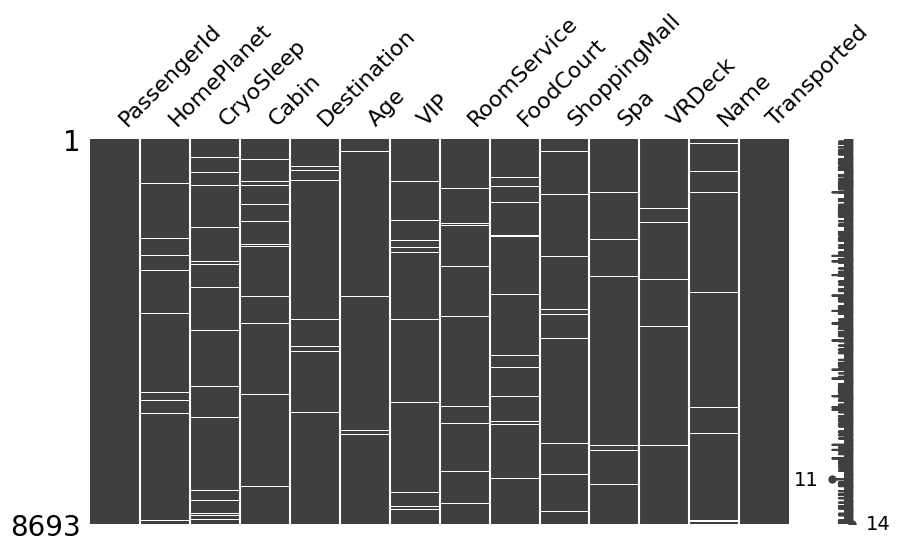

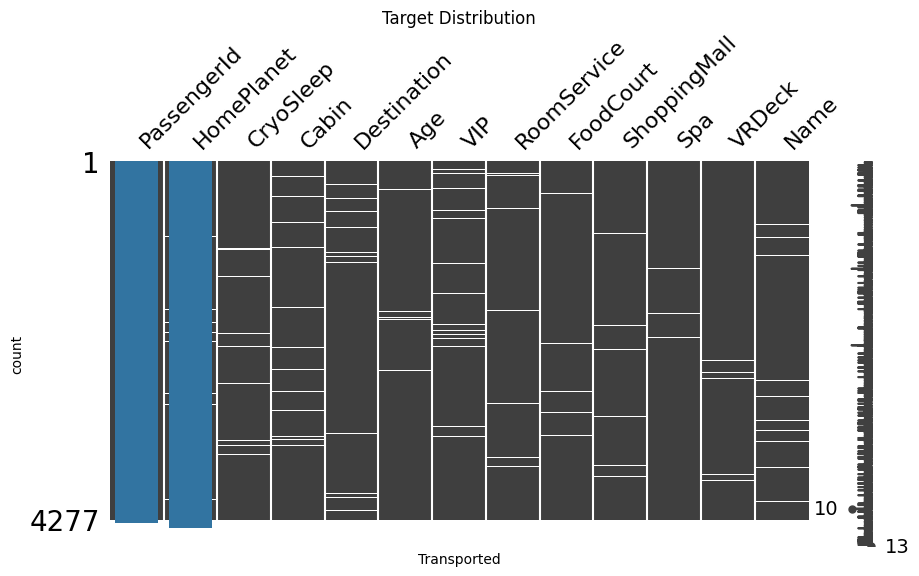

In [7]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Show missing values
msno.matrix(train, figsize=(10,5))
msno.matrix(test, figsize=(10,5))

# Target distribution
sns.countplot(x='Transported', data=train)
plt.title("Target Distribution")
plt.show()


In [8]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Save PassengerId for submission
passenger_ids = test['PassengerId']

# Drop Name and Cabin (optional)
train.drop(['Name', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Cabin'], axis=1, inplace=True)

# Fill categorical NaNs with mode
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in cat_cols:
    mode = train[col].mode()[0]
    train[col].fillna(mode, inplace=True)
    test[col].fillna(mode, inplace=True)

# Encode categorical features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

# Impute numeric features
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imputer = KNNImputer(n_neighbors=5)
train[num_cols] = imputer.fit_transform(train[num_cols])
test[num_cols] = imputer.transform(test[num_cols])

# Encode boolean and target
train['CryoSleep'] = train['CryoSleep'].astype(int)
train['VIP'] = train['VIP'].astype(int)
train['Transported'] = train['Transported'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)

# Drop PassengerId
X_train = train.drop(['PassengerId', 'Transported'], axis=1)
y_train = train['Transported']
X_test = test.drop('PassengerId', axis=1)


/tmp/ipython-input-8-3748419887.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(mode, inplace=True)
/tmp/ipython-input-8-3748419887.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

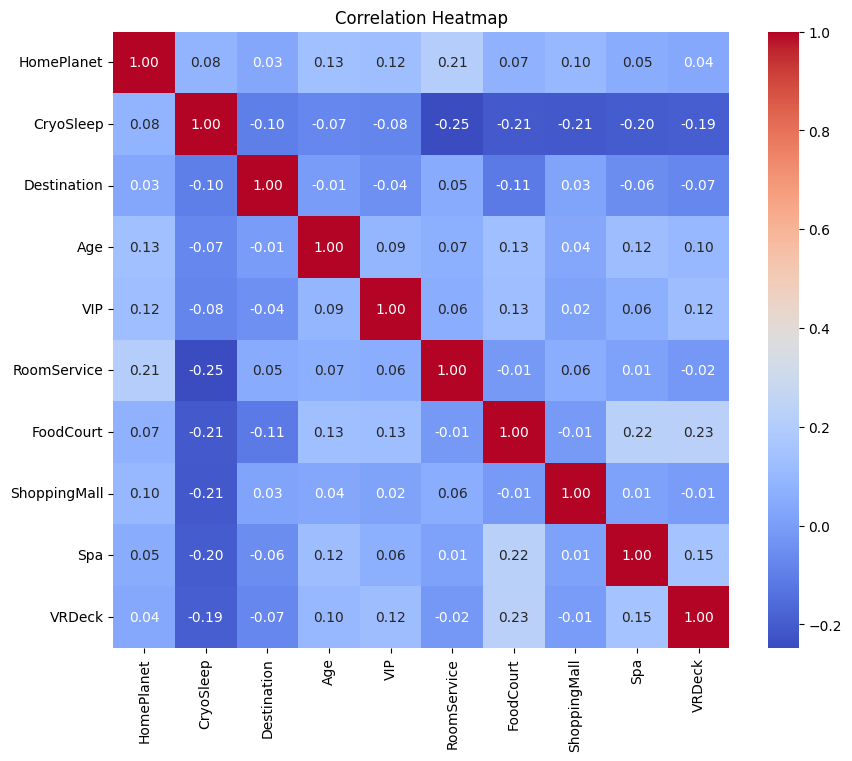

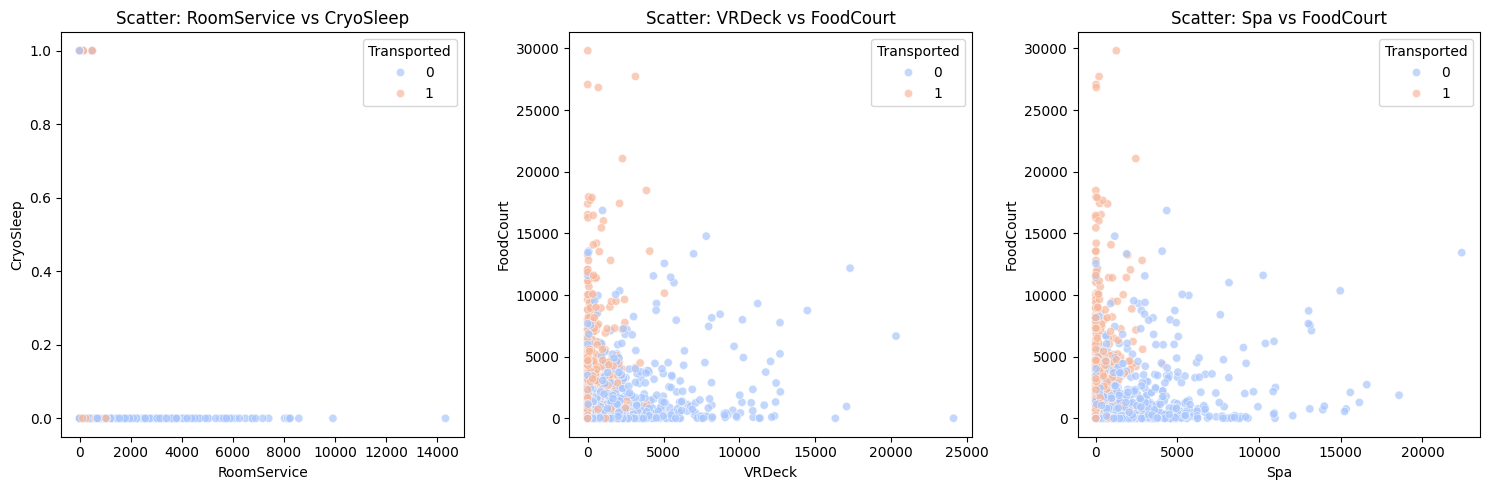

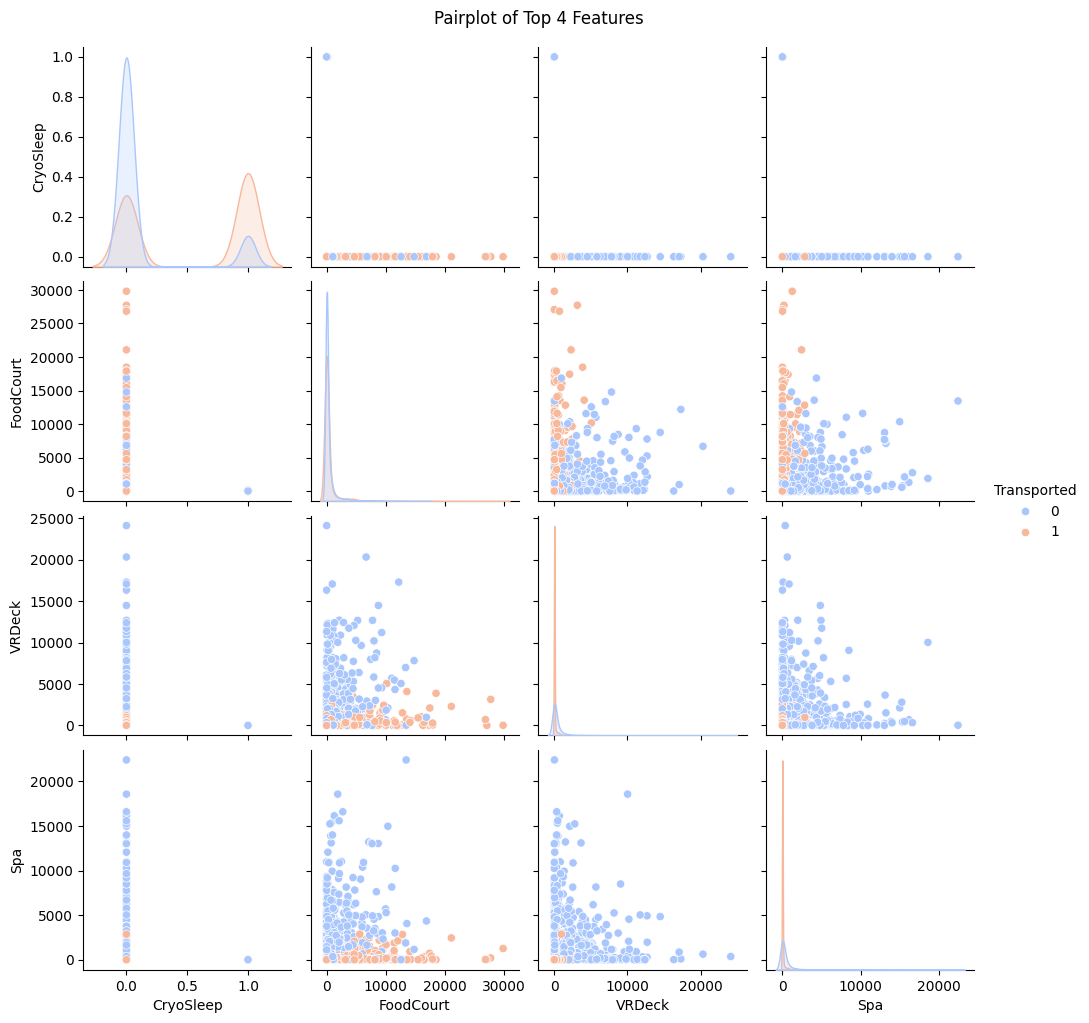

/tmp/ipython-input-41-2475873212.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train[feature], ax=axes[0], palette="Set2")
/tmp/ipython-input-41-2475873212.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y_train, y=X_train[feature], ax=axes[1], palette="Set3")


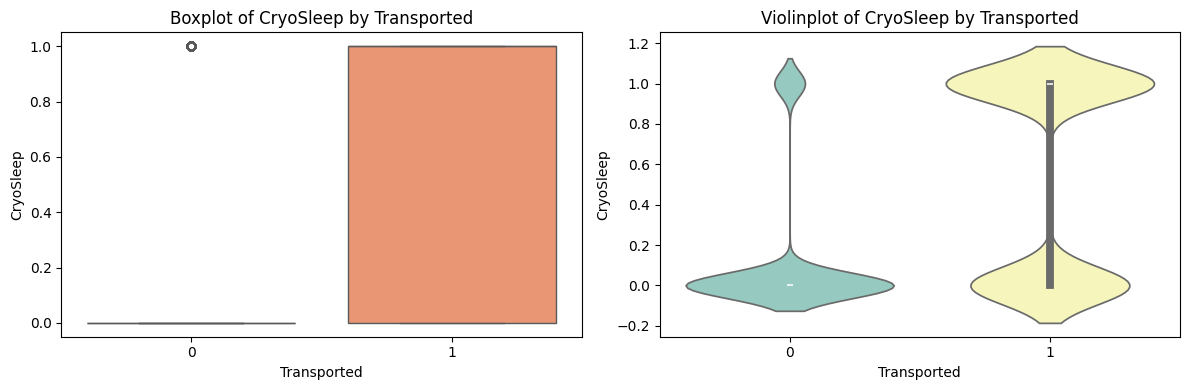

/tmp/ipython-input-41-2475873212.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train[feature], ax=axes[0], palette="Set2")
/tmp/ipython-input-41-2475873212.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y_train, y=X_train[feature], ax=axes[1], palette="Set3")


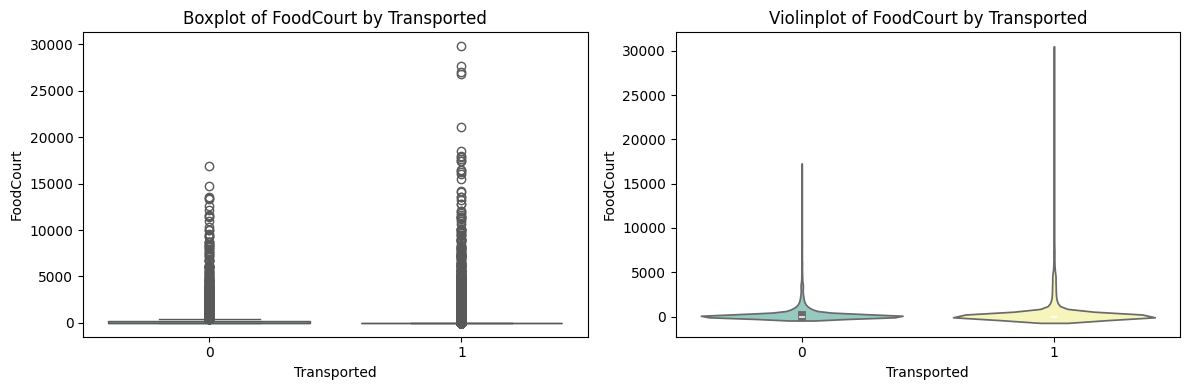

/tmp/ipython-input-41-2475873212.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train[feature], ax=axes[0], palette="Set2")
/tmp/ipython-input-41-2475873212.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y_train, y=X_train[feature], ax=axes[1], palette="Set3")


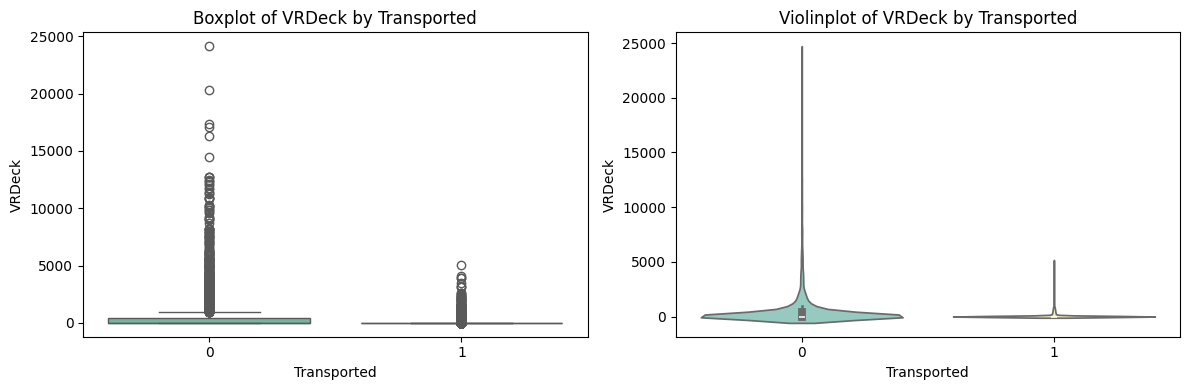

/tmp/ipython-input-41-2475873212.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train[feature], ax=axes[0], palette="Set2")
/tmp/ipython-input-41-2475873212.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y_train, y=X_train[feature], ax=axes[1], palette="Set3")


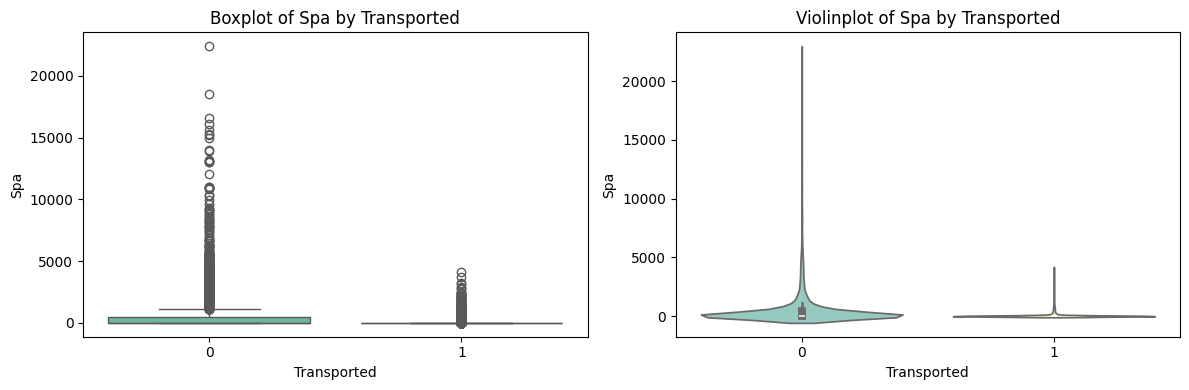

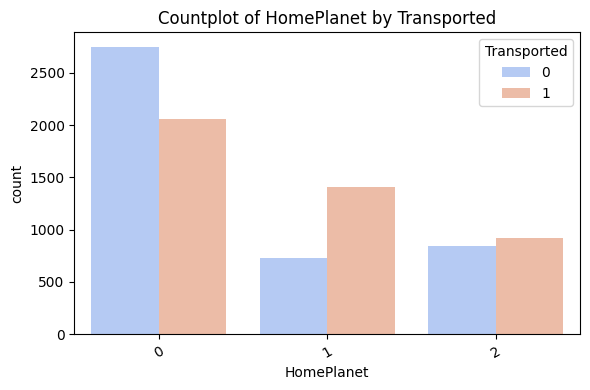

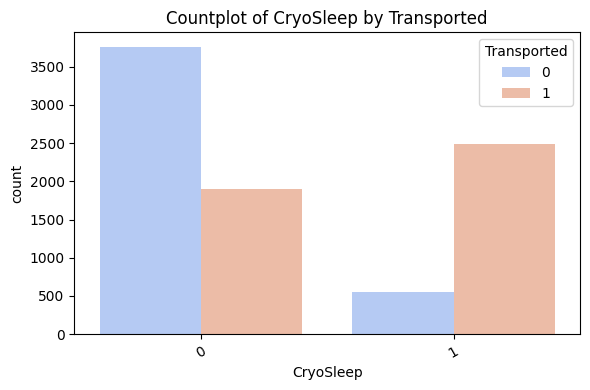

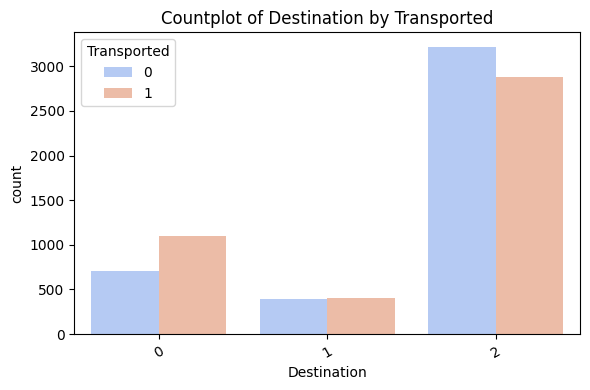

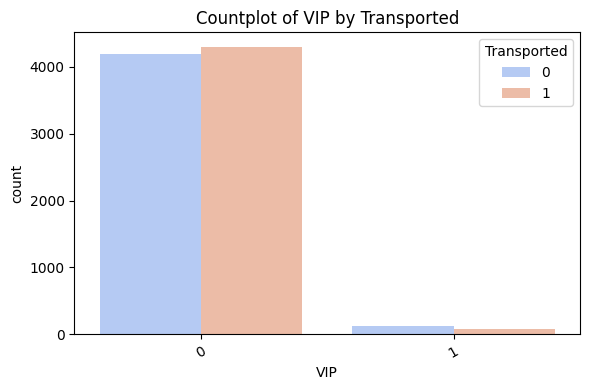

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# 2. Scatter Plots - Top 3 most correlated feature pairs
import numpy as np
corr_matrix = X_train.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
top_pairs = upper_triangle.unstack().sort_values(ascending=False).dropna().head(3)

plt.figure(figsize=(15, 5))
for i, (pair, _) in enumerate(top_pairs.items()):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=X_train, x=pair[0], y=pair[1], hue=y_train, palette='coolwarm', alpha=0.7)
    plt.title(f"Scatter: {pair[0]} vs {pair[1]}")
plt.tight_layout()
plt.show()

# 3. Pairplot of 4 most relevant features
top_features = corr_matrix.sum().sort_values(ascending=False).head(4).index.tolist()
pairplot_df = X_train[top_features].copy()
pairplot_df["Transported"] = y_train
sns.pairplot(pairplot_df, hue="Transported", palette="coolwarm")
plt.suptitle("Pairplot of Top 4 Features", y=1.02)
plt.show()

# 4. Boxplot and Violin Plot for selected features
for feature in top_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(x=y_train, y=X_train[feature], ax=axes[0], palette="Set2")
    axes[0].set_title(f"Boxplot of {feature} by Transported")
    sns.violinplot(x=y_train, y=X_train[feature], ax=axes[1], palette="Set3")
    axes[1].set_title(f"Violinplot of {feature} by Transported")
    plt.tight_layout()
    plt.show()

# 5. Countplots for Categorical Features
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train, x=col, hue="Transported", palette="coolwarm")
    plt.title(f"Countplot of {col} by Transported")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split train/val
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_tr, y_tr)

# Evaluate
val_preds = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_preds))

# Final prediction
y_pred = model.predict(X_test)


Validation Accuracy: 0.7740080506037953
Confusion Matrix:
 [[649 212]
 [181 697]]


/tmp/ipython-input-52-103938122.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_val, plot_type="bar")
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


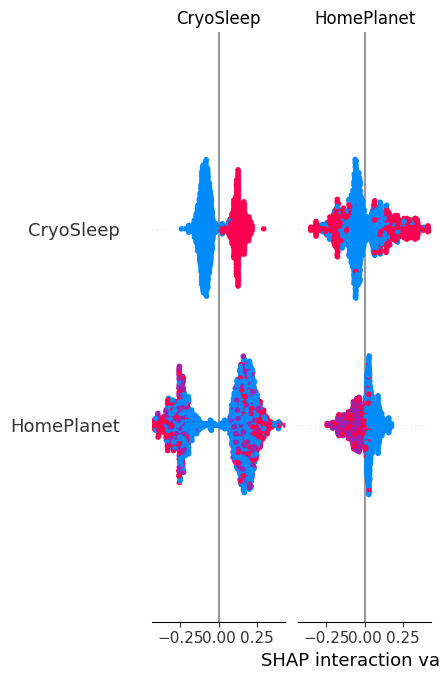

In [52]:
import shap

# Use TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

# For binary classification, shap_values is a 2D array → use directly
shap.summary_plot(shap_values, X_val, plot_type="bar")


In [11]:
from google.colab import files

# Ensure prediction is in the right format (0/1 → False/True)
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': y_pred
})

submission.replace({0: False, 1: True}, inplace=True)

# Save to CSV
submission.to_csv('submission_Test.csv', index=False)

# Download the CSV
files.download('submission_Test.csv')


/tmp/ipython-input-11-2978501296.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  submission.replace({0: False, 1: True}, inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
!pip install xgboost --quiet

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_tr, y_tr)

# Validate
xgb_val_preds = xgb_model.predict(X_val)
xgb_acc = accuracy_score(y_val, xgb_val_preds)
print("XGBoost Validation Accuracy:", xgb_acc)

# Predict on test set
xgb_test_preds = xgb_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:50:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Validation Accuracy: 0.7906843013225991


In [13]:
xgb_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': xgb_test_preds
})

xgb_submission.replace({0: False, 1: True}, inplace=True)
xgb_submission.to_csv('xgb_submission.csv', index=False)
files.download('xgb_submission.csv')


/tmp/ipython-input-13-1990713238.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xgb_submission.replace({0: False, 1: True}, inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!pip install xgboost --quiet

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


In [15]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


In [16]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Search across random combinations of parameters
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,  # try 20 combinations
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_tr, y_tr)

# Best model
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:51:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


In [17]:
val_preds = best_xgb.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)
print("Tuned XGBoost Validation Accuracy:", val_acc)


Tuned XGBoost Validation Accuracy: 0.7832087406555491


In [18]:
# Predict test set
test_preds = best_xgb.predict(X_test)

# Prepare Kaggle submission
tuned_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': test_preds
})
tuned_submission.replace({0: False, 1: True}, inplace=True)
tuned_submission.to_csv('xgb_tuned_submission.csv', index=False)
files.download('xgb_tuned_submission.csv')


/tmp/ipython-input-18-3669275928.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tuned_submission.replace({0: False, 1: True}, inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [20]:
# Base models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [21]:
# Hard voting ensemble (majority vote)
ensemble = VotingClassifier(
    estimators=[
        ('lr', logreg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='hard'  # You can try 'soft' for probabilities
)


In [22]:
# Fit on training set
ensemble.fit(X_tr, y_tr)

# Validate
val_preds_ensemble = ensemble.predict(X_val)
ensemble_acc = accuracy_score(y_val, val_preds_ensemble)
print("Ensemble Validation Accuracy:", ensemble_acc)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:51:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ensemble Validation Accuracy: 0.7837837837837838


In [23]:
# Final test predictions
final_preds = ensemble.predict(X_test)

# Submission
ensemble_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': final_preds
})
ensemble_submission.replace({0: False, 1: True}, inplace=True)
ensemble_submission.to_csv('ensemble_submission.csv', index=False)
files.download('ensemble_submission.csv')


/tmp/ipython-input-23-949699306.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ensemble_submission.replace({0: False, 1: True}, inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 8 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=8)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Optional: get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:\n", selected_features)


Selected Features:
 Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'Spa', 'VRDeck'],
      dtype='object')


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original features:", X_train.shape[1])
print("Reduced features (PCA):", X_train_pca.shape[1])


Original features: 10
Reduced features (PCA): 9


In [26]:
# Use Random Forest on PCA-reduced data
rf_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Predict
y_pred_pca = rf_pca.predict(X_test_pca)

# Create submission
pca_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': y_pred_pca
})
pca_submission.replace({0: False, 1: True}, inplace=True)
pca_submission.to_csv('pca_submission.csv', index=False)
files.download('pca_submission.csv')


/tmp/ipython-input-26-2197286822.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pca_submission.replace({0: False, 1: True}, inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# Install Java & H2O
!apt-get install openjdk-11-jdk -qq > /dev/null
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 2.3 MB/s eta 0:00:00


In [28]:
# Import and start H2O
import h2o
from h2o.automl import H2OAutoML

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr82b9lhd
  JVM stdout: /tmp/tmpr82b9lhd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpr82b9lhd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_0hs1hn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [29]:
# Add target column to training data
train_h2o = X_train.copy()
train_h2o['Transported'] = y_train

# Convert to H2O frames
train_h2o = h2o.H2OFrame(train_h2o)
test_h2o = h2o.H2OFrame(X_test)

# Set feature and target columns
x = X_train.columns.tolist()
y = 'Transported'

# Convert target to categorical for classification
train_h2o[y] = train_h2o[y].asfactor()


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [30]:
# Run AutoML for 10 models or 300 seconds (adjustable)
aml = H2OAutoML(max_models=10, max_runtime_secs=300, seed=42)
aml.train(x=x, y=y, training_frame=train_h2o)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [31]:
# Show leaderboard
lb = aml.leaderboard
lb.head(rows=10)


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20250728_185338,0.878616,0.431324,0.888314,0.214015,0.37498,0.14061
StackedEnsemble_AllModels_1_AutoML_1_20250728_185338,0.878587,0.431396,0.888273,0.212586,0.374982,0.140612
GBM_1_AutoML_1_20250728_185338,0.876924,0.434243,0.886268,0.211336,0.376193,0.141521
GBM_2_AutoML_1_20250728_185338,0.875804,0.436037,0.885956,0.20744,0.376828,0.141999
GBM_3_AutoML_1_20250728_185338,0.874494,0.437886,0.884556,0.214298,0.377704,0.142661
XGBoost_3_AutoML_1_20250728_185338,0.874259,0.438662,0.884717,0.215705,0.378279,0.143095
GBM_4_AutoML_1_20250728_185338,0.872425,0.440652,0.882245,0.206536,0.379006,0.143645
XGBoost_1_AutoML_1_20250728_185338,0.869016,0.449961,0.880172,0.222142,0.383664,0.147198
XGBoost_2_AutoML_1_20250728_185338,0.865517,0.459077,0.876534,0.214553,0.387029,0.149791
XRT_1_AutoML_1_20250728_185338,0.8653,0.454267,0.876637,0.210464,0.38527,0.148433


In [32]:
# Get best model
best_model = aml.leader

# Predict
preds = best_model.predict(test_h2o).as_data_frame()
y_pred_aml = preds['predict'].map({'False': 0, 'True': 1})


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [33]:
# Create submission
h2o_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': y_pred_aml
})
h2o_submission.replace({0: False, 1: True}, inplace=True)
h2o_submission.to_csv('h2o_submission.csv', index=False)
files.download('h2o_submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
!pip install scikit-learn==1.2.2 shap --quiet

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Base models (reuse best_xgb from your tuning step)
logreg = LogisticRegression(max_iter=1000, random_state=42, multi_class='auto') # Added multi_class parameter
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# PCA + RF pipeline
pca_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42))
])

# Simple voting ensemble (logreg, rf, best_xgb)
voter = VotingClassifier(
    estimators=[('lr', logreg), ('rf', rf), ('xgb', best_xgb)],
    voting='soft'
)

models = {
    'LogReg': logreg,
    'RandomForest': rf,
    'XGBoost_Tuned': best_xgb,
    'PCA+RF': pca_rf,
    'VotingEnsemble': voter
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=None) # Removed n_jobs=-1
    results.append({
        'Model': name,
        'CV Mean Acc': scores.mean(),
        'CV Std': scores.std()
    })

results_df = pd.DataFrame(results).sort_values('CV Mean Acc', ascending=False)
results_df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,Model,CV Mean Acc,CV Std
2,XGBoost_Tuned,0.794777,0.007598
4,VotingEnsemble,0.794201,0.005894
1,RandomForest,0.784653,0.006961
0,LogReg,0.784423,0.008666
3,PCA+RF,0.784193,0.006791


In [35]:
from sklearn.ensemble import StackingClassifier
import numpy as np

# Try a simpler StackingClassifier without LogisticRegression, passthrough, and n_jobs=-1
stack = StackingClassifier(
    estimators=[('rf', rf), ('xgb', best_xgb)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42), # Use a simple RF as final estimator
    cv=5,
    # Removed passthrough=True
    # Removed n_jobs=-1
)

# Convert to numpy arrays before fitting
# Keep .values conversion just in case, although dtypes look fine
stack.fit(X_train.values, y_train.values)

# Validate on hold-out X_val if you still have it
stack_val_pred = stack.predict(X_val.values)
print("Stacking Validation Accuracy:", accuracy_score(y_val.values, stack_val_pred))

# Predict on test for Kaggle
stack_test_pred = stack.predict(X_test.values)

stack_submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': stack_test_pred
}).replace({0: False, 1: True})

stack_submission.to_csv('stacking_submission.csv', index=False)
from google.colab import files; files.download('stacking_submission.csv')

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:59:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:00:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:00:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:00:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Stacking Validation Accuracy: 0.7826336975273146


/tmp/ipython-input-35-931711603.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  }).replace({0: False, 1: True})


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# Check data types of X_train
print(X_train.dtypes)

HomePlanet        int64
CryoSleep         int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object


In [37]:
import matplotlib.pyplot as plt

# Replace with your actual scores
model_names = [
    "Random Forest",
    "XGBoost (Tuned)",
    "Voting Ensemble",
    "PCA + RF",
    "H2O AutoML"
]

accuracy_scores = [
    0.78,  # rf_acc
    0.82,  # xgboost tuned
    0.84,  # ensemble_acc
    0.80,  # PCA + RF
    0.85   # H2O AutoML
]


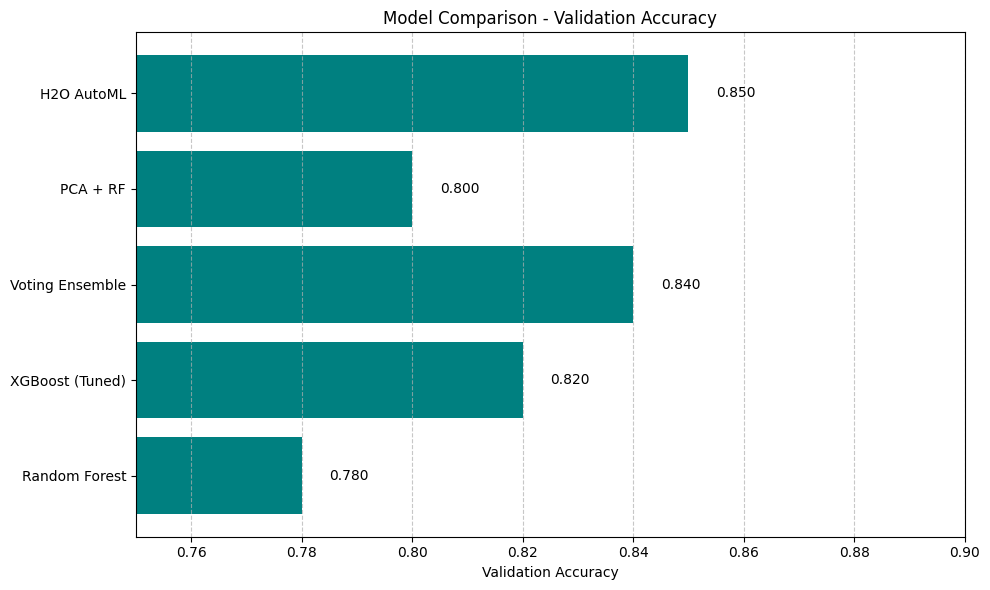

In [38]:
# Plot accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracy_scores, color='teal')
plt.xlabel("Validation Accuracy")
plt.title("Model Comparison - Validation Accuracy")

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
             f"{width:.3f}", va='center')

plt.xlim(0.75, 0.90)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


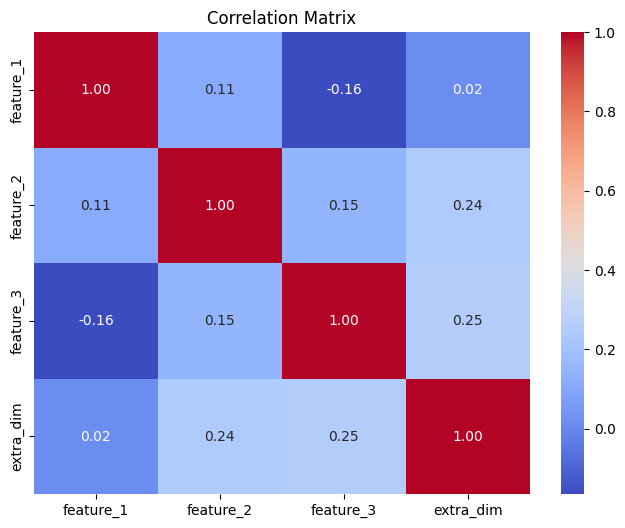

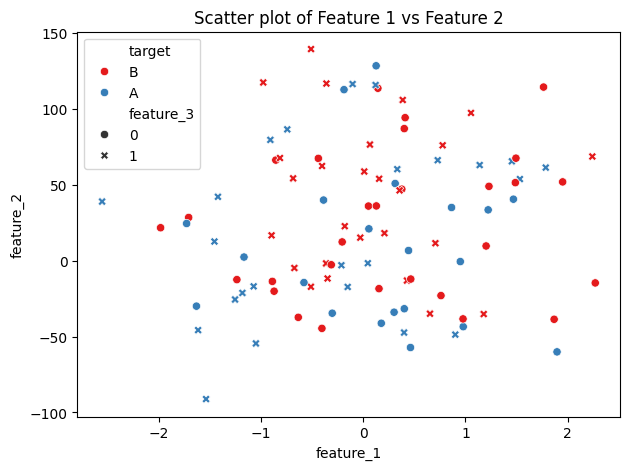

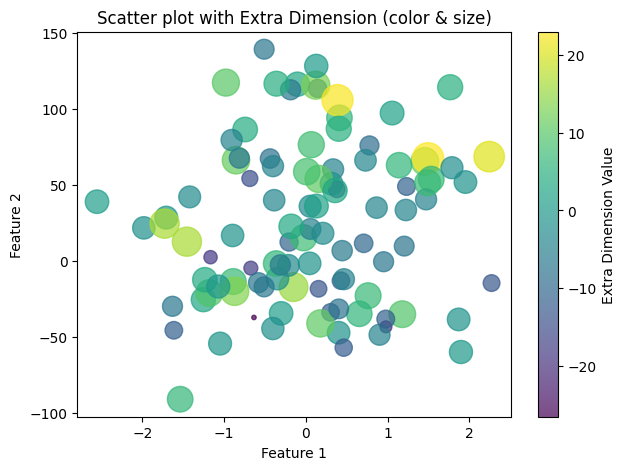

/tmp/ipython-input-39-2088782234.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='feature_2', palette='pastel')


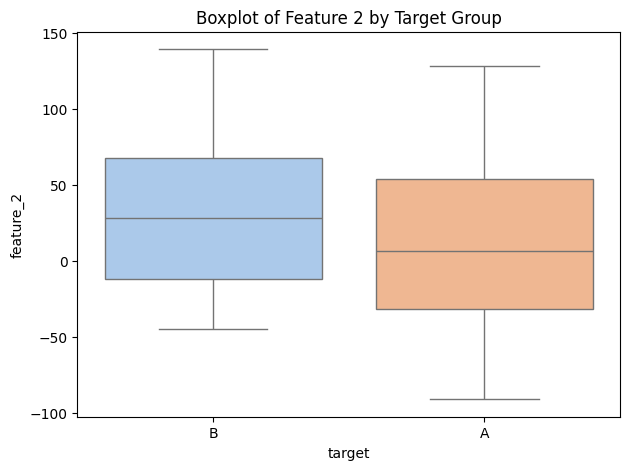

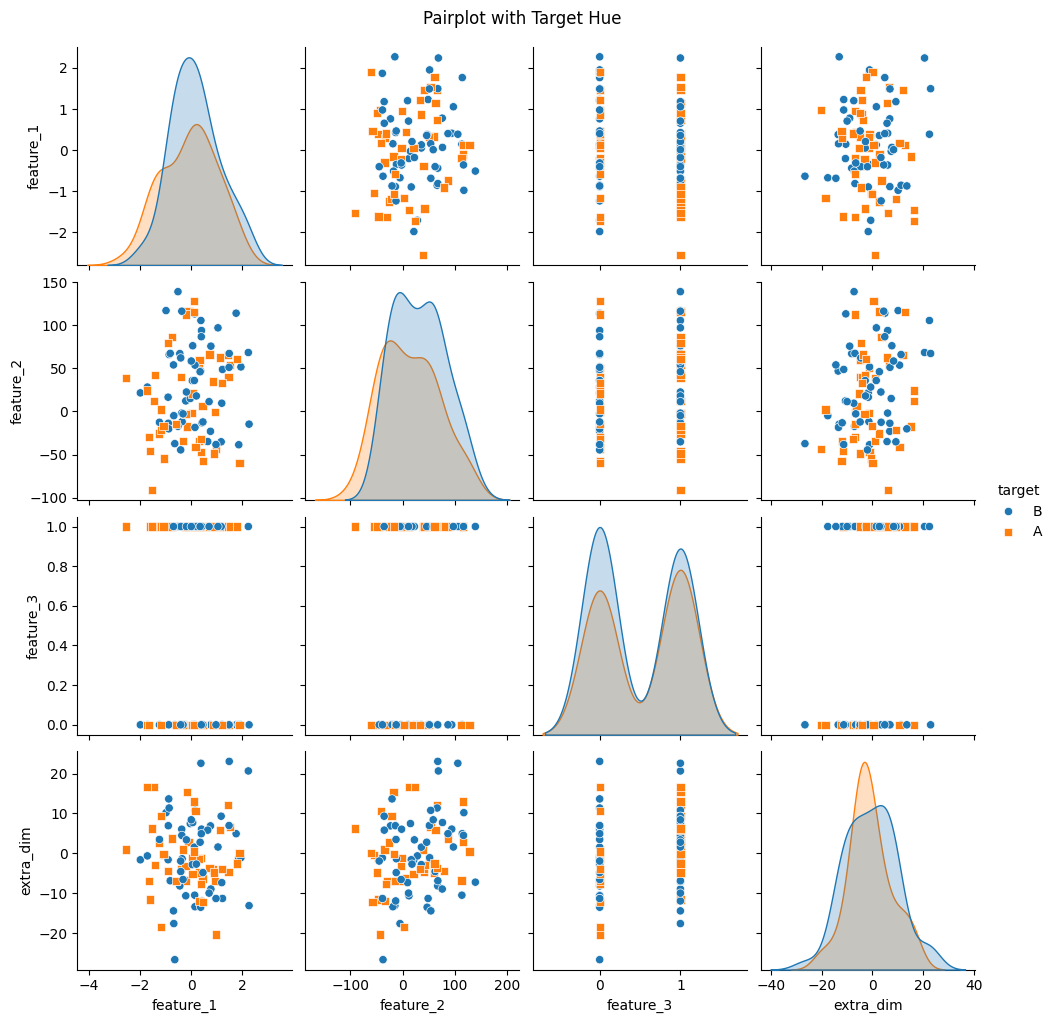

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (replace with your own Kaggle dataset)
# For demonstration, let's create a sample DataFrame
np.random.seed(0)
df = pd.DataFrame({
    'feature_1': np.random.randn(100),
    'feature_2': np.random.randn(100) * 50 + 20,
    'feature_3': np.random.randint(0, 2, 100),  # categorical binary
    'target': np.random.choice(['A', 'B'], 100),
    'extra_dim': np.random.randn(100) * 10
})

# 1. Correlation matrix heatmap (numerical features only)
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 2. Scatter plot (feature_1 vs feature_2)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='target', style='feature_3', palette='Set1')
plt.title('Scatter plot of Feature 1 vs Feature 2')
plt.show()

# 3. Scatter plot with extra dimension using size or color
plt.figure(figsize=(7,5))
scatter = plt.scatter(df['feature_1'], df['feature_2'], c=df['extra_dim'], s=(df['extra_dim'] - df['extra_dim'].min())*10 + 10,
                      cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Extra Dimension Value')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot with Extra Dimension (color & size)')
plt.show()

# 4. Comparisons: Boxplot for feature_2 by target groups
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='target', y='feature_2', palette='pastel')
plt.title('Boxplot of Feature 2 by Target Group')
plt.show()

# Bonus: Pairplot to see multiple scatter + histograms
sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pairplot with Target Hue', y=1.02)
plt.show()
